### IDs:
Insert yours IDs to the cell below

ID #1: -

ID #2: -


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [ ]:
#SETUP
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from scipy import stats
from sklearn import mixture
%matplotlib inline
plt.style.use('default') # You need to "reset" befoe you switch styles.
plt.style.use('seaborn-pastel')
mpl.rcParams['figure.figsize'] = [6, 4]

### Question 1 - Data viz - practical

Load Boston dataset from sklearn
1. Produce a histogram of the apartments’ price. 
2. Produce a box plot of the apartments’ price. 
3. Produce a correlation matrix of all the features.
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JoinPlot)
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

X = boston.data
columns = list(boston.feature_names)
y = boston.target
boston_df = pd.DataFrame(np.concatenate((X, y[:, np.newaxis]), axis=1), columns= columns + ['PRICE'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


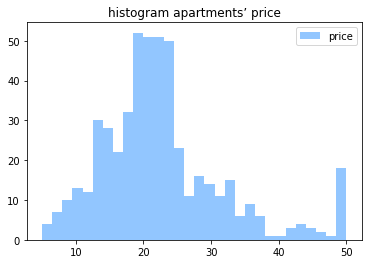

In [ ]:
# Produce a histogram of the apartments’ price.
plt.hist(boston_df['PRICE'], bins=30, label="price")
plt.title('histogram apartments’ price')
plt.legend();

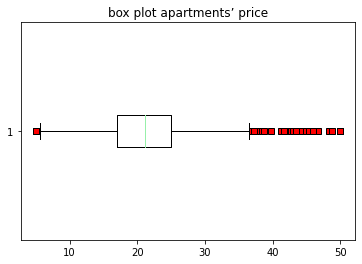

In [ ]:
#Produce a box plot of the apartments’ price.
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(boston_df['PRICE'], vert=False, flierprops=red_square);
plt.title('box plot apartments’ price');

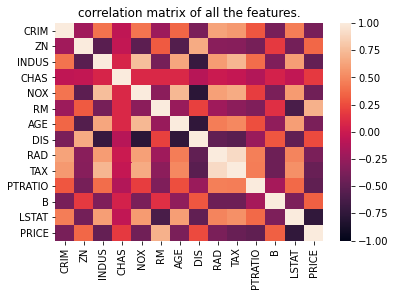

In [ ]:
#Produce a correlation matrix of all the features.
sns.heatmap(boston_df.corr(), vmin=-1, vmax=1)
plt.title('correlation matrix of all the features.');

max value is:  0.9102281885331822


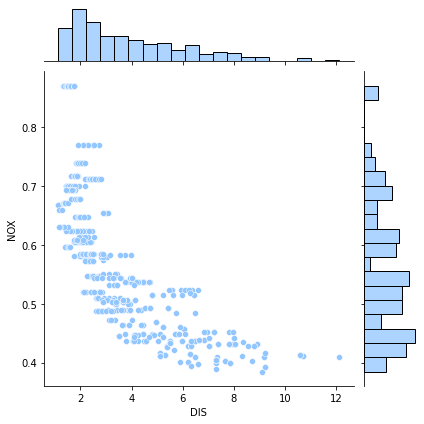

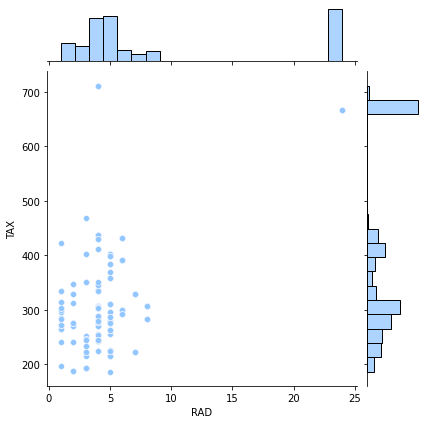

In [ ]:
#Select the 2 pairs of features with the highest correlation
#(positive or negative) and plot 2 scatter plots with marginal histograms (JoinPlot)
# print('min value is: ', # print(boston_df.corr[boston_df.corr().idxmin()])
# USD IDXMIN AND IDXMAX
# print(boston_df.corr[boston_df.corr().idxmin()])

x = boston_df['DIS']
y = boston_df['NOX']
sns.jointplot(x=boston_df['DIS'], y=boston_df['NOX'], marginal_kws=dict(bins=20));

x = boston_df.corr() < 1
x = boston_df.corr()[x][:]
print('max value is: ', x.max().max())
x = boston_df['RAD']
y = boston_df['TAX']
sns.jointplot(x=boston_df['RAD'], y=boston_df['TAX'], marginal_kws=dict(bins=20));

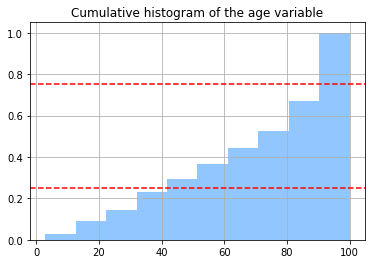

In [ ]:
#Produce a cumulative histogram of the age variable and add two horizontal lines on the
#first and third quartile (on the cumulative count)

#compute quartile
plt.axhline(0.25, color='r', linestyle='--')
plt.axhline(0.75, color='r', linestyle='--')

#Plot cumulative histogram
boston_df['AGE'].hist(density= True,cumulative = True)
plt.title('Cumulative histogram of the age variable')
plt.show()

###### Question 2 - Gaussian mixtures

In this question N(μ, σ2) stands for a normal distribution with mean μ and variance σ2. <br>
Fred, Mel and Sid are repair technicians who work for Randobezeq – a phone company. <br>
* Fast Fred takes time which is distributed as N(40, 16) to repair a telephone line failure at a customer’s home.
* Medium Mel takes time which is N(45, 36) for the same task.
* Slow Sid takes time which is N(50, 64) for the same task.

In [ ]:
from scipy import stats
Fred = stats.norm(loc = 40, scale = np.sqrt(16))

#### 2.A

Fred is due to arrive to repair your phone at 11AM tomorrow. How confident can you be that you will be done by 11:45? 

In [ ]:
round(Fred.cdf(45),2)

0.89

When a customer in North Randomistan orders a repair, there is a 40% chance Fred will do the work and 30% each that Mel or Sid will do the work. 

#### 2.B

What is the distribution of the duration of repair in North Randomistan?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

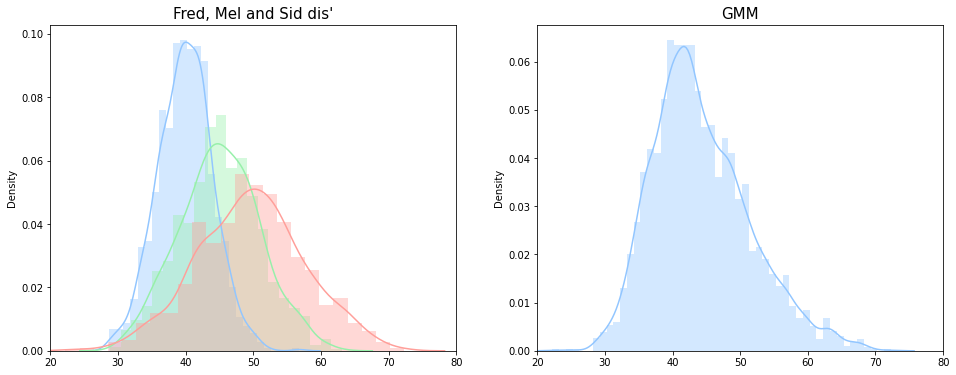

GMM mean:
44.27
GMM variance:
51.91


In [ ]:
Fred = stats.norm.rvs(loc = 40, scale = np.sqrt(16),size=1000)
Mel = stats.norm.rvs(loc = 45, scale = np.sqrt(36),size = 1000)
Sid = stats.norm.rvs(loc = 50, scale = np.sqrt(64),size = 1000)
# set w
w_fred, w_mel, w_sid = 0.4, 0.3, 0.3

# create the gmm data
gmm_data = []
for i in range(10000):
    
    p = stats.uniform.rvs(size=1)
    if p < w_fred:
            #append to fred
            gmm_data.append(np.random.choice(a=Fred, size=1))
    elif p < (w_fred + w_mel):
            #append to mel
            gmm_data.append(np.random.choice(a=Mel, size=1))
    else:
            #append to sid
            gmm_data.append(np.random.choice(a=Sid, size=1))


# plotting each gausiian snd GMM
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.distplot(Fred, ax=ax[0])
sns.distplot(Mel, ax=ax[0])
sns.distplot(Sid, ax=ax[0])
ax[0].set_title('Fred, Mel and Sid dis\'', fontdict={'fontsize': 15})
ax[0].set_xlim(20, 80)

sns.distplot(gmm_data, ax=ax[1])
ax[1].set_title('GMM', fontdict={'fontsize': 15})
ax[1].set_xlim(20, 80)
plt.show()
# gmm
print('GMM mean:')
print('{:.2f}'.format(np.mean(gmm_data)))
print('GMM variance:')
print('{:.2f}'.format(np.var(gmm_data)))

#### 2.C
Let Φ denote the CDF of a standard normal random variable. Use Φ to express the CDF of the duration of a repair in North Randomistan.

By definition, $\Phi_{repair} = \int_{-\infty}^{x} \phi_{repair}(x)dx$ with $\phi_{repair}(x)$ being the probability distribution function. For a Gaussian Mixture, $\phi_{repair}=\Sigma w_{i}\phi_{\mu_{i},\sigma_{i}}(x)$ with $w_{i}$ denoting weights and $\phi_{\mu_{i},\sigma_{i}}$ denoting a normal distribution with expectancy and std. deviation  $\mu_{i},\sigma_{i}$ , respectively. Pluging back into the CDF definition, 
$\Phi_{repair} 
= \int_{-\infty}^{x} \Sigma w_{i}\phi_{\mu_{i},\sigma_{i}}dx 
= \Sigma w_{i}\int_{-\infty}^{x}\phi_{\mu_{i},\sigma_{i}}dx 
= \Sigma w_{i}\Phi(\frac{x-\mu_{i}}{\sigma_{i}})$. 
Plugging in North Randomistan's parameters:
$ \Phi_{repair}=0.4 \Phi(\frac{x-40}{16}) + 0.3 \Phi(\frac{x-45}{36}) + 0.3 \Phi(\frac{x-50}{64}) $

#### 2.D

If the repair starts at 11AM, what is the earliest time for which the customer can assume, at a 95% certainty, that the repair will be already done?

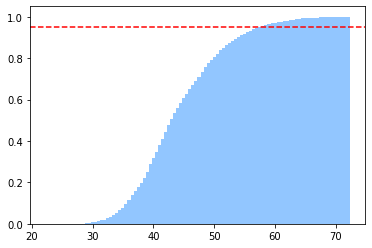

In [ ]:
gmm = []
for var in gmm_data:
    gmm.append(var[0])
gmm = np.array(gmm)
# plot the cdf
plt.axhline(y=0.95, color='r', linestyle='--')
plt.hist(gmm,bins = 100,cumulative=True,density=True)
plt.show()


### Question 3 - Gaussian mixtures – parameter estimation and generation

Consider the data provided in GMD.xlsx
Assume that the data comes from a Gaussian mixture distribution (GMD). Furthermore, assume that μ1=0 and that σ1=σ2=1.
Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

In [ ]:
df_gmd = pd.read_excel('GMD.xlsx',header=None, sheet_name='Sheet1')
#print(df_gmd.head())

### WAY no' 1 - Using Gaussian mixture with EM ###
print("="*20,"WAY no' 1 using Gaussian mixture with EM","="*20)
means_init = [[0],[np.mean(df_gmd)]]
# Fit a Gaussian mixture with EM using 2 components
gmm = mixture.GaussianMixture(n_components=2,means_init=means_init, covariance_type='full').fit(df_gmd)
print('mean 1=',round(gmm.means_[0][0],3),'   mean 2=',round(gmm.means_[1][0],3))
print('weight 1=',round(gmm.weights_[0],3),' weight 2=',round(gmm.weights_[1],3))
print("")
print("="*20,"Way no' 2","="*20)
################
print ("We know that : m1 = 0, we can claculate m,var")
print ("We show that m2 = (var +np.power(mean,2)-1)/mean")
print ("and w2 = m/m2")
print ("also w1= 1-w2")
print("")

var = pd.DataFrame.var(df_gmd)[0]
mean = np.mean(df_gmd)[0]
m2 = (var +np.power(mean,2)-1)/mean
w2= mean/m2
w1 =1-w2
m1=0
print('mean 1=',0,'   mean 2=',round(m2,3))
print('weight 1=',round(w1,3),' weight 2=',round(w2,3))


FileNotFoundError: ignored

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

In [ ]:
sns.distplot(df_gmd,bins=100)
s_gmd = np.std(df_gmd)[0]
mean_gmd = np.mean(df_gmd)[0]
plt.xlim(xmin= mean_gmd-3*s_gmd , xmax= mean_gmd+3*s_gmd)
# The limits are where the cdf is 0.997 by the formula : P(μ-3s ≤ Y ≤ μ+3s) 
plt.show()

NameError: ignored

#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  μ1+3 and μ2+5 
* σ1=σ2=1
* w1=w2=0.5

#### way 1
Like we did in the first question-
1. create a normal distrubution to each geonosian with size of N
2. create an empty GMD array
3. do N times:
    - randomize a P(probability) that considerate the weight of each distrubution
    - add to the GMD array a value from one of the normal distrubution
    
#### way 2
1. Genarate 2 normal distrubution with size of 500
2. join  the 2 vectors into one which represent the GMD


#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


In [ ]:
m1 = m1 + 3
m2 = m2 + 5
s1 = s2 = 1
print(m1,m2)

NameError: ignored

3 8.989112000321045


NameError: name 'c1' is not defined

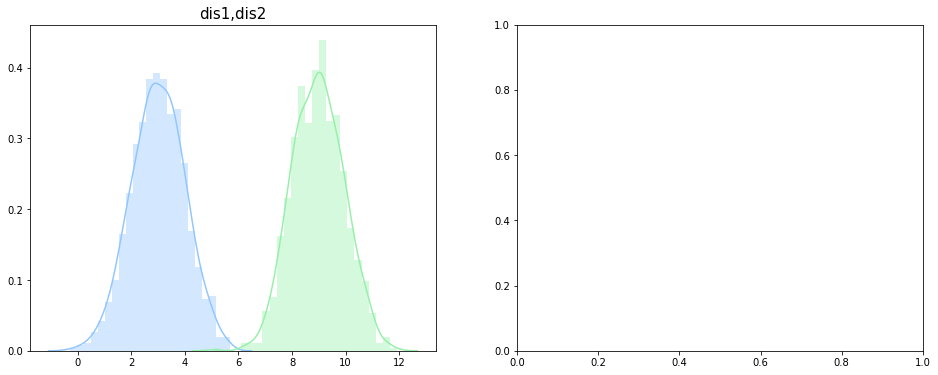

In [ ]:
m1 = m1 + 3
m2 = m2 + 5
s1 = s2 = 1
print(m1,m2)

dis1 = stats.norm.rvs(loc = m1, scale = s1 ,size=1000)
dis2 = stats.norm.rvs(loc = m2, scale = s1 ,size = 1000)
# set w
w_dis1, w_dis3 = 0.5, 0.5

# create the gmm data
gmd_data = []
for i in range(10000):
    p = stats.uniform.rvs(size=1)
    if p < w_dis1:
            #append to dis 1
            gmd_data.append(np.random.choice(a=dis1, size=1))
    else:
            #append to dis 2
            gmd_data.append(np.random.choice(a=dis2, size=1))

# plotting each gausiian and the GMD
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.distplot(dis1, ax=ax[0])
sns.distplot(dis2, ax=ax[0])
ax[0].set_title('dis1,dis2', fontdict={'fontsize': 15})
ax[0].set_xlim(m1-3*c1, m2+3*c2)

sns.distplot(gmd_data, ax=ax[1])
s_gmd = np.std(gmd_data)
mean_gmd = np.mean(gmd_data)
ax[1].set_title('GMD', fontdict={'fontsize': 15})
ax[1].set_xlim(mean_gmd-3*s_gmd,mean_gmd+3*s_gmd)
plt.show()


#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


In [ ]:
dis1 = stats.norm.rvs(loc = m1, scale = s1 ,size=500)
dis2 = stats.norm.rvs(loc = m2, scale = s1 ,size = 500)

dis_gmd = np.append(dis1,dis2)

# plotting each gausiian and the GMD
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.distplot(dis_gmd, ax=ax[0],bins=100)
ax[0].set_title('Way2', fontdict={'fontsize': 15})
ax[0].set_xlim(m1-3*c1, m2+3*c2)

sns.distplot(gmd_data, ax=ax[1],bins=100)
s_gmd = np.std(gmd_data)
mean_gmd = np.mean(gmd_data)
ax[1].set_title('Way1', fontdict={'fontsize': 15})
ax[1].set_xlim(mean_gmd-3*s_gmd,mean_gmd+3*s_gmd)
plt.show()

NameError: ignored

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 50,000 RCU and a standard deviation of 20,000 RCU.

#### 4.A
What percent of people earn less than 40,000 RCU?

In [ ]:
m = 50000
s = 20000
ds = stats.norm(loc = m, scale = s)
print(round(ds.cdf(40000),2)*100,'%')

31.0 %


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [ ]:
print(round(ds.cdf(65000)-ds.cdf(45000),2)*100,'%')

37.0 %


#### 4.C
What percent of people earn more than 70,000 RCU?

In [ ]:
print(round(1-ds.cdf(70000),2)*100,'%')

16.0 %


#### 4.D
The company has 1000 employees. Do you expect that there are any employees that earn more than 120,000 RCU?  

In [ ]:
p = 1-ds.cdf(120000)
q = 1-p
print (round((1-np.power(q,1000))*100,1),"%")
print ("with 20% We ecpecting not")

20.8 %
with 20% We ecpecting not


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

\begin{equation*}
\operatorname{E}(T)  = n \cdot H_n
\end{equation*}


In [ ]:
# Function to find N-th Harmonic Number  . taken from https://www.geeksforgeeks.org/program-to-find-the-nth-harmonic-number/
def nthHarmonic(N) : 
    # H1 = 1  
    harmonic = 1.00
    # loop to apply the forumula  
    # Hn = H1 + H2 + H3 ... +  
    # Hn-1 + Hn-1 + 1/n  
    for i in range(2, N + 1) : 
        harmonic += 1 / i 
    return harmonic 

def mean(N):
    return N*nthHarmonic(N);

#### 5.B
Write code to compute the exact value of $V(T_{N})$

$$ V(T_{N})= \sum_{i=1}^{n} Var(x_{i}) $$

In [ ]:
def var(N):
    sum = 0
    for i in range(1,N+1):
        p = (N-i+1)/N
        sum = sum+ stats.geom.var(p)
    return sum
  

print (var(60))

5581.467638253023


/usr/local/lib/python3.6/dist-packages/scipy/stats/_discrete_distns.py:362: RuntimeWarning: divide by zero encountered in true_divide
  g1 = (2.0-p) / sqrt(qr)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_discrete_distns.py:363: RuntimeWarning: divide by zero encountered in true_divide
  g2 = np.polyval([1, -6, 6], p)/(1.0-p)


#### 5.C
Write code to exactly compute $P(T_{20}>60)$

In [ ]:
def probLarger(succ,tries):
    from scipy.stats import geom
    
    p = (succ - np.arange(succ)) / succ
    
    try_vec = np.arange(tries) + 1
    p1 = geom.pmf(try_vec, p[0])
    
    for current in p[1:]:
        p_i = geom.pmf(try_vec, current)
        p1 = np.convolve(p1, p_i)
    
    return 1 - p1[:tries+1-succ].sum()

print(round(probLarger(20,40),3))

NameError: ignored

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

In [ ]:
L1=60
m20=mean(20)
v20=var(20)
s20=np.sqrt(v20)

k = (L1-m20)/np.sqrt(s20)

L2 = 2*m20-L1
upperLimit = v20/(60-m20)**2 - (1- probLarger(20,round(L2)) )
print(upperLimit)

3.207021644946872


/usr/local/lib/python3.6/dist-packages/scipy/stats/_discrete_distns.py:362: RuntimeWarning: divide by zero encountered in true_divide
  g1 = (2.0-p) / sqrt(qr)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_discrete_distns.py:363: RuntimeWarning: divide by zero encountered in true_divide
  g2 = np.polyval([1, -6, 6], p)/(1.0-p)


### Question 6 - More on convolutions

Let n be an integer, not prime. <br>
Find two distributions a and b on the nonnegative integers, both not concentrated at 0 (this is the trivial answer…), such that the convolution of a and b is the equiprobable (uniform) distribution on the set of numbers 0, 1, 2, . . . , n-1. <br>
\* Note: If n is prime this is not possible, but the proof is not so easy. 

If n is a non-prime, there exist integers $q,p \ne n,1$ such that $qp=n$. let $\delta[n]$ denote the unit impulse function and let $a=\frac{1}{p}\sum_{i=0}^{p-1} \delta[n-i \cdot q]$ be a q-spaced sequence of p impulses of height 1/p starting at n=0. Now, let $b=\Theta_{0,q-1}[n]$ denote a uniform distribution between 0 and q-1 (i.e. a sequence of q values of height 1/q). Convolving a and b yields p copies of b, each of length q and spaced q apart, starting at 0. Since no overlapping occurs, all value are identical. Each value is $\frac{1}{p \cdot q}=\frac{1}{n}$. The total number of values is $p \cdot q = n$ , thus, the resulting distribution is $a * b = \Theta_{0,n-1}$ .